<a href="https://colab.research.google.com/github/swetha-rrr/2348567/blob/main/new8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import pickle
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,train_test_split,StratifiedKFold,cross_val_score,learning_curve

In [2]:
data=pd.read_csv('/content/spam_ham_dataset.csv',error_bad_lines=False)

<ipython-input-2-0534560f41a0>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data=pd.read_csv('/content/spam_ham_dataset.csv',error_bad_lines=False)


In [3]:
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
data.shape

(5171, 4)

In [5]:
data.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [7]:
data.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

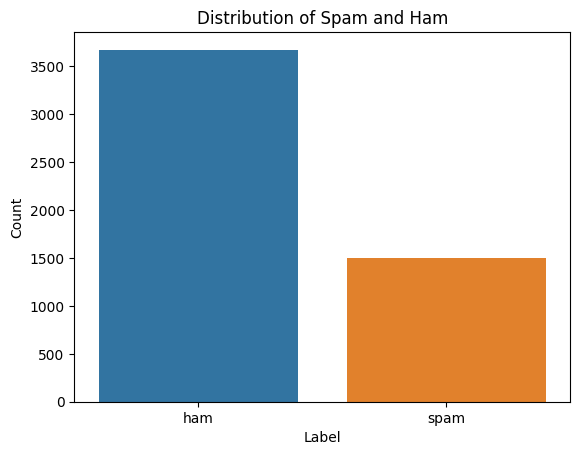

In [ ]:
sns.countplot(data=data, x="label")

plt.title("Distribution of Spam and Ham")
plt.xlabel("Label")
plt.ylabel("Count")

plt.show()



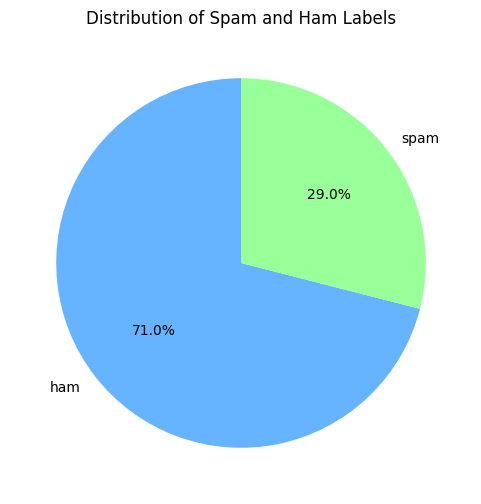

In [8]:
label_counts = data['label'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99'])
plt.title('Distribution of Spam and Ham Labels')
plt.show()

converting spam and ham to 0 and 1

removing punctuation and stopwords from the text ,essages

In [37]:
X = data['text']
Y = data['label']
from sklearn.model_selection import train_test_split as tt
X_train, X_test, Y_train, Y_test = tt(X, Y,test_size=0.2, random_state=100)

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer(stop_words ='english')
vector.fit(X_train)

CountVectorizer(stop_words='english')

In [39]:
vector.vocabulary_


{'subject': 38283,
 'day': 13748,
 'change': 10645,
 'revision': 34645,
 'hpl': 21784,
 'nom': 29174,
 'february': 17978,
 '10': 231,
 '2001': 993,
 'attached': 6714,
 'file': 18203,
 'hplno': 21790,
 '210': 1063,
 'xls': 43367,
 'fyi': 19213,
 'wanted': 42225,
 'let': 25495,
 'know': 24723,
 'entex': 16795,
 'information': 22821,
 'following': 18623,
 'directory': 14835,
 'logistics': 25969,
 'reference': 33979,
 'tab': 38829,
 'historical': 21415,
 'volumes': 41996,
 'risk': 34855,
 'folder': 18605,
 'erms': 17035,
 'intra': 23179,
 'texas': 39352,
 'databases': 13702,
 'think': 39509,
 'need': 28790,
 'ac': 4385,
 'et': 17167,
 'vi': 41685,
 'codin': 11594,
 'le': 25304,
 'ally': 5448,
 'baronial': 7384,
 'fy': 19210,
 'dmabi': 15173,
 'hey': 21258,
 'ofore': 29726,
 'phacy': 31268,
 'specials': 37496,
 'viin': 41781,
 'van': 41437,
 'ax': 7030,
 'tariff': 39000,
 'pleaove': 31742,
 'taunt': 39025,
 'accompaniment': 4439,
 'yjhanl': 43630,
 'pactwmtnfbiiw': 30481,
 'pl': 31643,
 'ym

In [40]:
X_train_transformed =vector.transform(X_train)
X_test_transformed =vector.transform(X_test)

In [41]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_transformed,Y_train)
y_pred = model.predict(X_test_transformed)
y_pred_prob = model.predict_proba(X_test_transformed)

In [43]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print(confusion_matrix(Y_test,y_pred))
print()
print(accuracy_score(Y_test,y_pred))

[[713  12]
 [ 13 297]]

0.9758454106280193


In [44]:
print(precision_score(Y_test,y_pred))
print()
print(recall_score(Y_test,y_pred))
print()
print(f1_score(Y_test,y_pred))
print()


0.9611650485436893

0.9580645161290322

0.9596122778675283



In [45]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred_prob[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.9939532814238041


In [46]:
print(false_positive_rate)
print()
print(true_positive_rate)
print()
print(thresholds)

[0.         0.00689655 0.00689655 0.00689655 0.00689655 0.00827586
 0.00827586 0.00965517 0.00965517 0.01103448 0.01103448 0.01241379
 0.01241379 0.0137931  0.0137931  0.01655172 0.01655172 0.01793103
 0.01793103 0.01793103 0.01793103 0.01793103 0.02068966 0.02068966
 0.02206897 0.02206897 0.02896552 0.02896552 0.03034483 0.03034483
 0.07310345 0.07586207 0.12827586 0.13103448 0.16413793 0.16689655
 0.23586207 0.23862069 0.36       0.36275862 0.48275862 0.48689655
 0.51586207 0.51862069 0.5337931  0.53655172 0.60827586 0.61103448
 0.72551724 0.72827586 0.76965517 0.77241379 0.81931034 0.82206897
 0.82482759 0.82758621 0.95586207 1.        ]

[0.         0.61935484 0.62903226 0.63548387 0.79032258 0.79032258
 0.79677419 0.79677419 0.84193548 0.84193548 0.89354839 0.89354839
 0.93548387 0.93548387 0.95806452 0.95806452 0.96451613 0.96451613
 0.96774194 0.97741935 0.98064516 0.98709677 0.98709677 0.99032258
 0.99032258 0.99354839 0.99354839 0.99677419 0.99677419 1.
 1.         1.         

In [47]:
data = pd.DataFrame({'Threshold': thresholds,
              'TPR': true_positive_rate,
              'FPR':false_positive_rate
             })
data.head()

,Threshold,TPR,FPR
0,2.0,0.000000,0.000000
1,1.0,0.619355,0.006897
2,1.0,0.629032,0.006897
3,1.0,0.635484,0.006897
4,1.0,0.790323,0.006897


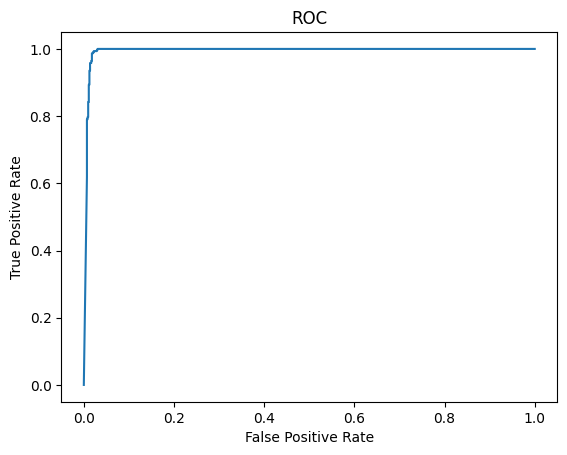

In [48]:
%matplotlib inline
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)